In [45]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.conv_learner import *
from fastai.dataset import *
from fastai.transforms import *
from fastai.models import *
from fastai.sgdr import *
from fastai.plots import *

import pandas as pd
import pickle

In [46]:
home = os.path.expanduser('~')
data_dir = Path(os.path.join(home,'data/kaggle/dog-breed-identification'))
train_dir = data_dir.joinpath('train')
test_dir = data_dir.joinpath('test')

In [47]:
print('no of training images: ',len(os.listdir(data_dir.joinpath('train'))))
print('no of test images    : ',len(os.listdir(data_dir.joinpath('test'))))


labels = pd.read_csv(data_dir.joinpath('labels.csv'))
labels['id'] += '.jpg'
labels.to_csv(data_dir.joinpath('labels_ext.csv'),index=False)
print('no of breeds         : ', labels['breed'].nunique())
labels.head()

no of training images:  10222
no of test images    :  10357
no of breeds         :  120


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
2,001cdf01b096e06d78e9e5112d419397.jpg,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever


#### Check the class distribution


In [4]:
def show_img(img,ax,figsize):
    ax.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
def draw_text(ax, xy, text, size=14):
    text = ax.text(*xy,text,verticalalignment='top',color='white',fontsize=size,weight='bold')
    draw_outline(text,1)
    
def show_imgs(imgs,rows=3,cols=3,figsize=(8,6)):
    fig, axes = plt.subplots(rows, cols,)
    for idx, ax in enumerate(axes.flat):
        show_img(img=imgs[idx],ax=ax,figsize=figsize)
#         draw_text()

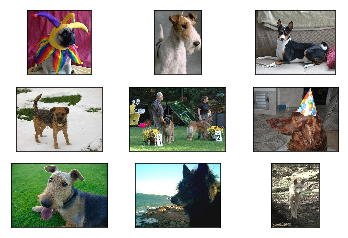

In [5]:
sample_train_paths = random.choices(os.listdir(train_dir),k=9)
sample_train_paths = [os.path.join(train_dir,o) for o in sample_train_paths]
sample_train_imgs = [open_image(o) for o in sample_train_paths]

show_imgs(sample_train_imgs,3,3,(12,12))

In [13]:
arch = resnet34
sz = 224
bs = 64

tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on)
data = ImageClassifierData.from_csv(data_dir,'train',data_dir.joinpath('labels_ext.csv'),bs=64,tfms=tfms,test_name='test')
learn = ConvLearner.pretrained(arch, data)

In [52]:
learn.lr_find()

 95%|█████████▍| 121/128 [00:50<00:02,  2.40it/s, loss=25.5]

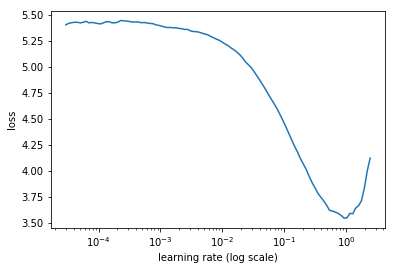

In [53]:
learn.sched.plot()

In [11]:
learn.fit(0.1,n_cycle=4)
learn.save('breeds-1')

epoch      trn_loss   val_loss   accuracy                   
    0      1.311872   0.677504   0.789628  
    1      0.882947   0.630439   0.816047                    
    2      0.711229   0.565005   0.823875                    
    3      0.626335   0.564651   0.833659                    



In [15]:
learn.load('breeds-1')
preds = learn.predict(is_test=True)

In [27]:
print('shape of predictions: ', preds.shape)
print('no of classes: ', len(data.classes))
files = [o.split('/')[-1] for o in data.test_ds.fnames]
ids = [o.split('.')[0] for o in files]
print(ids[:2])
print(len(ids))

shape of predictions:  (10357, 120)
no of classes:  120
['bf42e3a0ab4afdecc5e26fc0cf651da1', '9a1f108a37b3bd43edbf5d41c67d527c']
10357


In [43]:
df.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier,id
0,-18.549160,-14.762392,-16.904442,-13.657563,-19.263786,-11.537458,-16.579063,-15.608324,-8.433904,-11.212982,...,-16.770451,-17.011751,-12.100702,-18.838549,-0.006255,-17.343704,-17.343668,-15.012433,-16.309021,bf42e3a0ab4afdecc5e26fc0cf651da1
1,-13.269127,-16.187611,-15.102391,-17.806137,-20.319258,-13.820091,-16.572439,-14.620220,-11.129333,-11.397439,...,-14.574197,-16.786957,-13.613141,-18.566139,-6.942367,-13.607817,-18.587040,-14.522070,-11.597927,9a1f108a37b3bd43edbf5d41c67d527c
2,-6.534067,-2.205300,-8.248133,-7.374963,-10.131574,-9.265360,-10.202669,-10.454570,-6.459154,-9.353162,...,-11.159052,-9.359123,-9.244506,-10.155128,-8.368272,-7.902297,-10.284643,-11.937898,-7.960555,4c3fb315701d8760182459ae74e1a314
3,-15.459275,-14.485828,-14.293356,-13.244299,-0.044735,-14.070550,-13.190190,-13.364743,-14.058156,-11.914243,...,-12.170051,-12.665668,-11.365927,-10.797853,-15.256371,-11.327302,-11.070992,-15.514977,-14.581787,ffadae851b94ece57602da7edf72d689
4,-14.606531,-14.734798,-11.633821,-13.751388,-0.050119,-9.534079,-10.061442,-8.234615,-11.458543,-7.987600,...,-7.014651,-12.685273,-4.322220,-10.865681,-12.668488,-10.071798,-8.892614,-8.911535,-13.382539,ab398a45b623e9a24f842132fe816b6a


In [37]:
def create_submission_file(learn,output_file,tta=False):
    #predict, check if test time augmention is enabled
    if tta:
        preds, y = learn.TTA(is_test=True)
        probs = np.exp(preds)
        probs = np.mean(probs,axis=0)  #mean of augmented probabilities
    else:
        preds = learn.predict(is_test=True)
        probs = np.exp(preds)
        
    df = pd.DataFrame(data=probs,columns=learn.data.classes)
    
    #get the ids of the test images
    files = [o.split('/')[-1] for o in data.test_ds.fnames]
    ids = [o.split('.')[0] for o in files]
    
    #create csv
    df['id'] = ids
    cols = ['id']
    cols.extend(learn.data.classes)
    df.reindex(columns=cols).to_csv(output_file,index=False)

In [45]:
create_submission_file(ids, preds, data.classes,'dog_breed.csv')
!kaggle competitions submit -c dog-breed-identification -f 'dog_breed.csv' -m 'breeds-1'

Successfully submitted to Dog Breed Identification

This gives a kaggle score of 0.56706 (could have been a position of 718/1286)

### SGD with restarts
Same steps to create the learner.... We will use the same learning rate. The only change is the cycle_len param

In [11]:
arch = resnet34
sz = 224
bs = 64

tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on)
data = ImageClassifierData.from_csv(data_dir,'train',data_dir.joinpath('labels_ext.csv'),bs=64,tfms=tfms,test_name='test')
learn = ConvLearner.pretrained(arch, data)

In [56]:
learn.fit(1e-1,n_cycle=8,cycle_len=2)
learn.save('breeds-sgdr')

epoch      trn_loss   val_loss   accuracy                   
    0      1.312919   0.642222   0.797456  
    1      0.749532   0.544763   0.820939                    
    2      0.801326   0.614757   0.804795                    
    3      0.581572   0.525898   0.825342                    
    4      0.650775   0.551092   0.826321                    
    5      0.513996   0.51889    0.833659                    
    6      0.601874   0.549521   0.827789                    
    7      0.45773    0.50814    0.83953                     
    8      0.526533   0.541905   0.830235                    
    9      0.405833   0.526801   0.834638                    
    10     0.490273   0.57       0.831703                    
    11     0.383648   0.540892   0.837084                    
    12     0.441094   0.5523     0.83317                     
    13     0.356177   0.54688    0.833659                    
    14     0.39964    0.564988   0.834638                    
    15     0.3336     0.537

In [18]:
learn.load('breeds-sgdr')
create_submission_file(learn,'breeds_sgdr.csv')
!kaggle competitions submit -c dog-breed-identification -f 'breeds_sgdr.csv' -m 'breeds_sgdr'

Successfully submitted to Dog Breed Identification

Kaggle Score is 0.53434. Could have been placed 718/1286

### SGDR with TTA
Let us use tta for predictions

In [28]:
learn.load('breeds-sgdr')
preds_6, y = learn.TTA(is_test=True)
with open('breeds_sgdr_tta_preds.pickle','wb') as f:
    pickle.dump(preds_6,f)
create_submission_file(learn,'breeds_sgdr_tta.csv',tta=True)
!kaggle competitions submit -c dog-breed-identification -f 'breeds_sgdr_tta.csv' -m 'breeds_sgdr_tta2'

Score is 0.47198, which would have been position 643/1286

### Training earlier layers

In [12]:
arch = resnet34
sz = 224
bs = 64

tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on)
data = ImageClassifierData.from_csv(data_dir,'train',data_dir.joinpath('labels_ext.csv'),bs=64,tfms=tfms,test_name='test')
learn = ConvLearner.pretrained(arch, data)

In [42]:
learn.unfreeze()
lr = np.array([1e-4,1e-3,1e-1])
learn.fit(lr,n_cycle=2,cycle_len=3)

epoch      trn_loss   val_loss   accuracy                    
    0      0.630702   0.668252   0.801859  
    1      0.442681   0.600195   0.829256                    
    2      0.31167    0.57371    0.836106                    
    3      0.423609   0.695158   0.803816                    
    4      0.305743   0.601961   0.829256                    
    5      0.23991    0.594023   0.837084                    



[array([0.59402]), 0.8370841494278431]

In [43]:
learn.save('breeds-all-layers')

In [44]:
learn.load('breeds-all-layers')
preds, y = learn.TTA(is_test=True)
with open('breeds_all_layers.pickle','wb') as f:
    pickle.dump(preds,f)
create_submission_file(learn,'breeds_all_layers.csv',tta=True)
!kaggle competitions submit -c dog-breed-identification -f 'breeds_all_layers.csv' -m 'breeds_all_layers'

Successfully submitted to Dog Breed Identification

score worsened to 0.51299

### Inception

In [49]:
arch = inception_4
sz = 224
bs = 64

tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on)
data = ImageClassifierData.from_csv(data_dir,'train',data_dir.joinpath('labels_ext.csv'),bs=64,tfms=tfms,test_name='test')
learn = ConvLearner.pretrained(arch, data)

Downloading: "https://s3.amazonaws.com/pytorch/models/inceptionv4-58153ba9.pth" to /home/achinta/.torch/models/inceptionv4-58153ba9.pth
100%|██████████| 171130880/171130880 [01:50<00:00, 1552053.29it/s]


In [51]:
learn.fit(1e-1,n_cycle=3,cycle_len=2,cycle_mult=2,best_save_name='breeds_inception')

epoch      trn_loss   val_loss   accuracy                    
    0      0.378768   0.420164   0.874755  
    1      0.316642   0.393846   0.884051                    
    2      0.38001    0.438657   0.872309                    
    3      0.329194   0.425483   0.876223                    
    4      0.299224   0.411306   0.88454                     
    5      0.259404   0.412759   0.882094                    
    6      0.349608   0.428081   0.878669                    
    7      0.351216   0.45814    0.870841                    
    8      0.315349   0.42659    0.885029                    
    9      0.295647   0.434773   0.882094                    
    10     0.252215   0.426874   0.895303                    
    11     0.239942   0.421136   0.886497                    
    12     0.227034   0.420818   0.888454                    
    13     0.233656   0.420017   0.887476                    


[array([0.42002]), 0.8874755382771128]

In [52]:
preds, y = learn.TTA(is_test=True)
create_submission_file(learn,'breeds_inception.csv',tta=True)
!kaggle competitions submit -c dog-breed-identification -f 'breeds_inception.csv' -m 'breeds_all_layers' 

Successfully submitted to Dog Breed Identification

  Score of 0.38639 which would have given an position of 563/1286